As this is a humongous dataset by keeping in mind the result and the calculation Time we have made an effort to reduce the datset without really affecting the prediction.

**DATASET LINK**
https://data.cityofnewyork.us/Transportation/Automated-Traffic-Volume-Counts/7ym2-wayt/about_data


**ABOUT DATASET**
Dataset Explanation for Traffic Prediction and Adaptive Navigation Project:
The dataset we are using for this project comes from New York City Department of Transportation (NYC DOT) and includes Automated Traffic Volume Counts collected via Automated Traffic Recorders (ATRs). These recorders are installed at key intersections and bridge crossings across NYC, measuring traffic volume at different times of day.

Key Components of the Dataset:
Date:

This column represents the date on which the traffic volume was recorded. It allows us to analyze traffic trends over time (e.g., seasonal variations).
Hour:

This column indicates the specific hour of the day during which the traffic was measured. This is crucial for time-of-day traffic analysis (e.g., rush hours).
Traffic Volume:

This column represents the count of vehicles passing through the specific traffic point (e.g., intersections) during a given time period. This is the target variable that our model will aim to predict based on other factors such as the time of day and weather conditions.

Size: Initially, the dataset spans multiple years (2014-2023) and is approximately 200 MB in size. However, we have reduced this to focus on a 6-month period (January to June 2022) and use a 20% random sample to keep the dataset at a more manageable size while preserving the key variability in traffic patterns.

Granularity: The traffic data is recorded hourly, which allows for detailed traffic predictions based on time of day. Aggregating data at the hourly level still provides a good balance between detail and dataset size.

In [1]:
# Resizing the dataset

In [3]:
import pandas as pd

# Load the NYC traffic dataset
df = pd.read_csv('/content/Automated_Traffic_Volume_Counts_20240929.csv')

# Display the first few rows
df.head()


RequestID    Boro    Yr  M   D  HH  MM  Vol  SegmentID  \
0      32970  Queens  2021  4  30   2   0    0     149701   
1      32970  Queens  2021  4  30   2  15    1     149701   
2      32970  Queens  2021  4  30   2  30    0     149701   
3      32970  Queens  2021  4  30   2  45    0     149701   
4      32970  Queens  2021  4  30   3   0    1     149701   

                                        WktGeom          street  \
0  POINT (997407.0998491726 208620.92612708386)  PULASKI BRIDGE   
1  POINT (997407.0998491726 208620.92612708386)  PULASKI BRIDGE   
2  POINT (997407.0998491726 208620.92612708386)  PULASKI BRIDGE   
3  POINT (997407.0998491726 208620.92612708386)  PULASKI BRIDGE   
4  POINT (997407.0998491726 208620.92612708386)  PULASKI BRIDGE   

                    fromSt      toSt Direction  
0  Newtown Creek Shoreline  Dead end        NB  
1  Newtown Creek Shoreline  Dead end        NB  
2  Newtown Creek Shoreline  Dead end        NB  
3  Newtown Creek Shoreline  Dead end        NB  
4  Newtown Creek Shoreline  Dead end        NB

In [4]:
# Filter for years 2020 to 2024
df_filtered = df[(df['Yr'] >= 2020) & (df['Yr'] <= 2024)]

# Display the filtered rows
df_filtered.head()


RequestID    Boro    Yr  M   D  HH  MM  Vol  SegmentID  \
0      32970  Queens  2021  4  30   2   0    0     149701   
1      32970  Queens  2021  4  30   2  15    1     149701   
2      32970  Queens  2021  4  30   2  30    0     149701   
3      32970  Queens  2021  4  30   2  45    0     149701   
4      32970  Queens  2021  4  30   3   0    1     149701   

                                        WktGeom          street  \
0  POINT (997407.0998491726 208620.92612708386)  PULASKI BRIDGE   
1  POINT (997407.0998491726 208620.92612708386)  PULASKI BRIDGE   
2  POINT (997407.0998491726 208620.92612708386)  PULASKI BRIDGE   
3  POINT (997407.0998491726 208620.92612708386)  PULASKI BRIDGE   
4  POINT (997407.0998491726 208620.92612708386)  PULASKI BRIDGE   

                    fromSt      toSt Direction  
0  Newtown Creek Shoreline  Dead end        NB  
1  Newtown Creek Shoreline  Dead end        NB  
2  Newtown Creek Shoreline  Dead end        NB  
3  Newtown Creek Shoreline  Dead end        NB  
4  Newtown Creek Shoreline  Dead end        NB

In [7]:
# Select relevant features for the model
df_filtered = df_filtered[['Yr', 'M', 'D', 'HH', 'Vol', 'Boro']]

# Optionally, you can encode the 'Boro' (Borough) column into numerical format
df_filtered['Boro'] = df_filtered['Boro'].astype('category').cat.codes
#df_filtered['Street'] = df_filtered['street'].astype('category').cat.codes
#df_filtered['Direction'] = df_filtered['Direction'].astype('category').cat.codes
# Display the cleaned data
df_filtered.head()


Yr  M   D  HH  Vol  Boro
0  2021  4  30   2    0     2
1  2021  4  30   2    1     2
2  2021  4  30   2    0     2
3  2021  4  30   2    0     2
4  2021  4  30   3    1     2

In [8]:
# Summary statistics for numerical columns
df_filtered.describe()


Yr            M            D           HH          Vol  \
count  4908.000000  4908.000000  4908.000000  4908.000000  4908.000000   
mean   2021.309902     6.639772    16.193358    11.540139   118.566422   
std       1.256865     2.800227     8.829886     6.924335   137.993738   
min    2020.000000     2.000000     1.000000     0.000000     0.000000   
25%    2020.000000     4.000000     8.000000     6.000000    24.000000   
50%    2021.000000     5.000000    17.000000    11.000000    69.000000   
75%    2022.000000     9.000000    24.000000    18.000000   182.000000   
max    2024.000000    11.000000    31.000000    23.000000   882.000000   

              Boro  
count  4908.000000  
mean      1.475550  
std       0.787883  
min       0.000000  
25%       1.000000  
50%       2.000000  
75%       2.000000  
max       2.000000

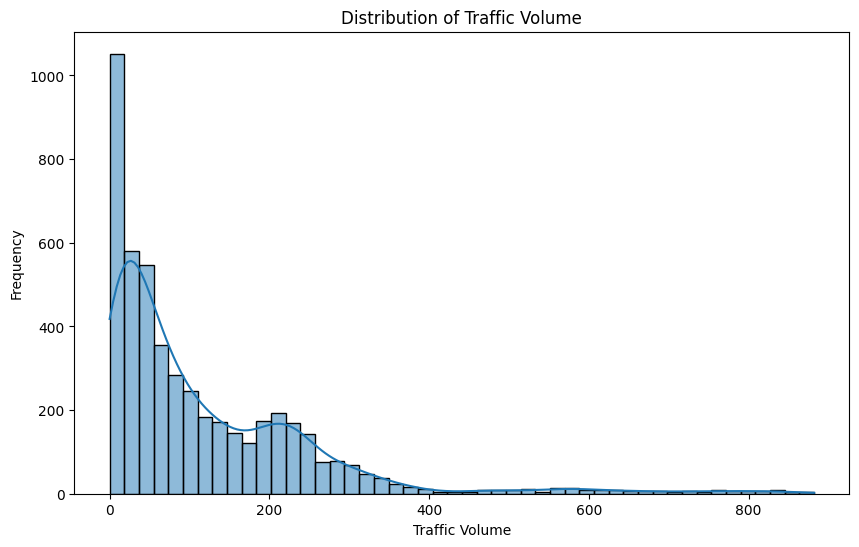

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of traffic volume
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['Vol'], kde=True)
plt.title("Distribution of Traffic Volume")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.show()


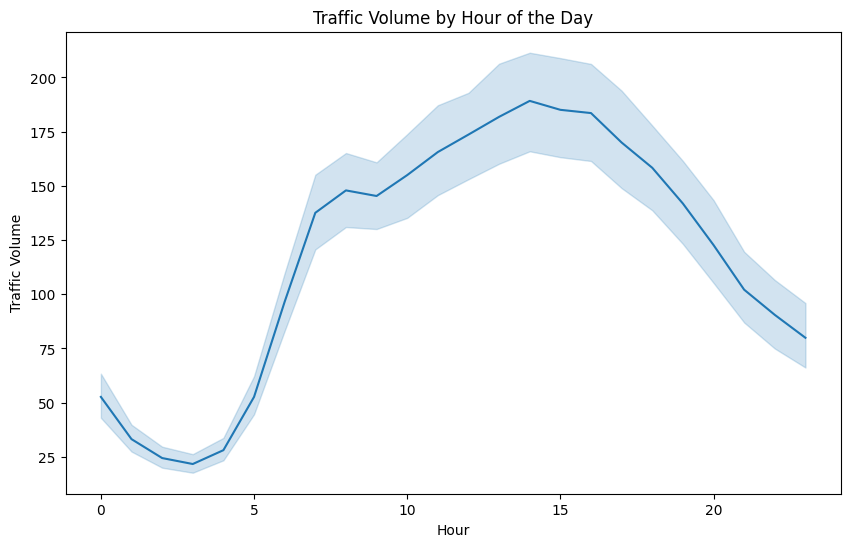

In [10]:
# Plotting traffic volume by hour
plt.figure(figsize=(10, 6))
sns.lineplot(x='HH', y='Vol', data=df_filtered)
plt.title("Traffic Volume by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Traffic Volume")
plt.show()


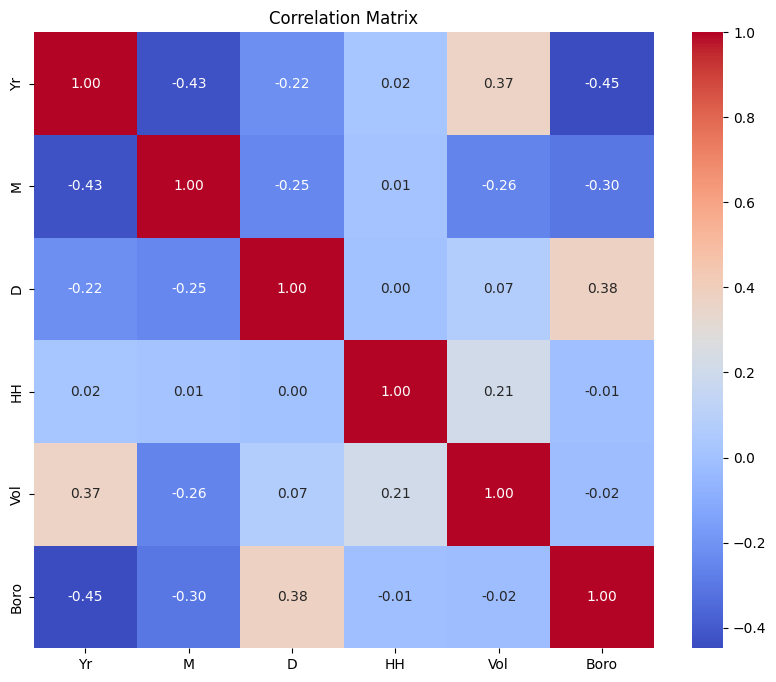

In [11]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_filtered.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


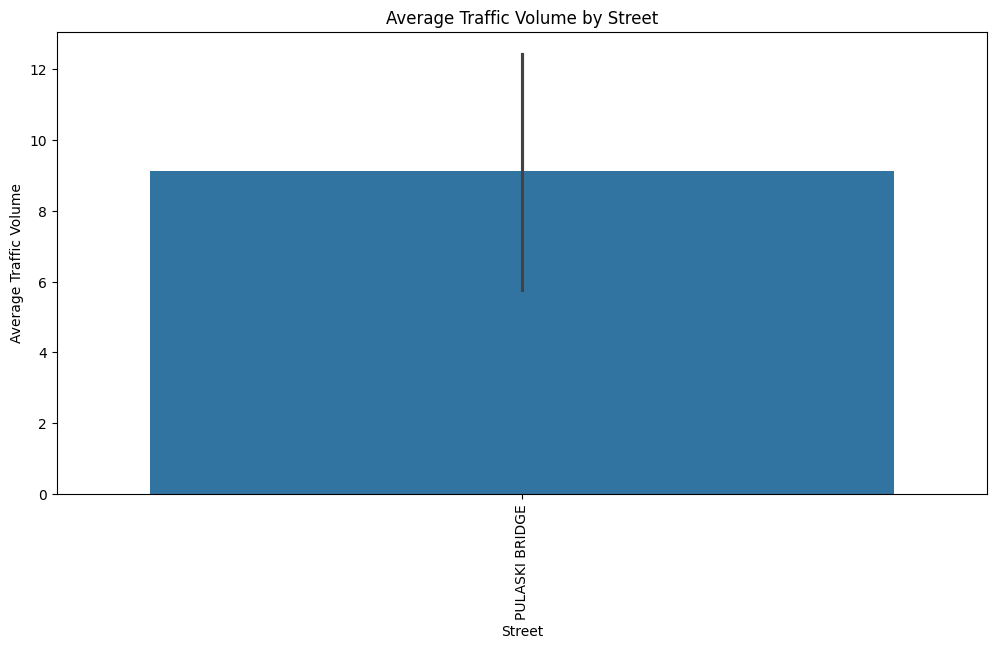

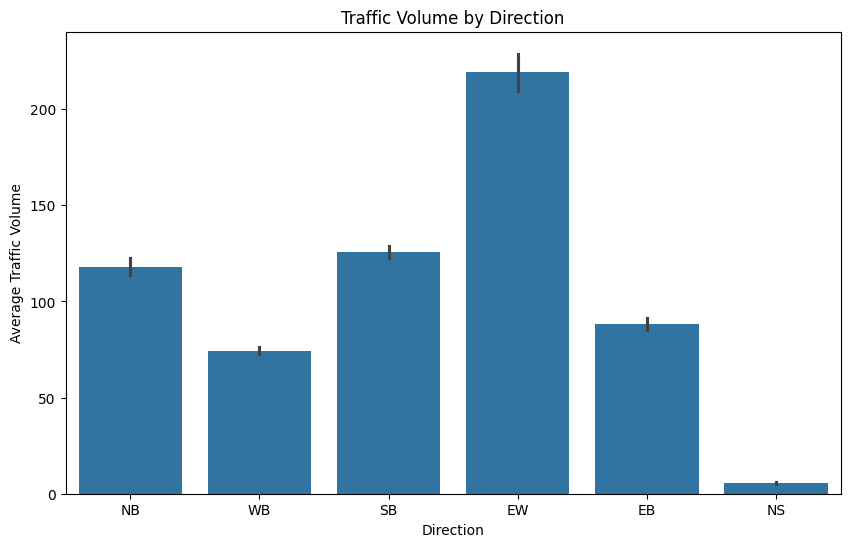

In [12]:
# Average traffic volume by street
plt.figure(figsize=(12, 6))
sns.barplot(x='street', y='Vol', data=df.head(30))  # Show top 30 streets for better readability
plt.title("Average Traffic Volume by Street")
plt.xticks(rotation=90)
plt.xlabel("Street")
plt.ylabel("Average Traffic Volume")
plt.show()

# Traffic volume by direction
plt.figure(figsize=(10, 6))
sns.barplot(x='Direction', y='Vol', data=df)
plt.title("Traffic Volume by Direction")
plt.xlabel("Direction")
plt.ylabel("Average Traffic Volume")
plt.show()


**Model Training**

In [14]:
# Features: year, month, day, hour, and possibly borough
X = df_filtered[['Yr', 'M', 'D', 'HH', 'Boro']]

# Target: traffic volume (Vol)
y = df_filtered['Vol']

# Train-test split (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Initialize the linear regression model
model = LinearRegression()

# Scale the features (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)


In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Root Mean Squared Error (RMSE): 121.03304826911139
R-squared: 0.21524542324225415


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate the model
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest R-squared: {r2_rf}")


Random Forest RMSE: 20.773467240463145
Random Forest R-squared: 0.9768823388628922


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [22]:
from xgboost import XGBRegressor
import pickle

# Initialize the XGBoost Regressor
xgb = XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xgb.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = xgb.predict(X_test_scaled)

# Evaluate the model
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb}")
print(f"XGBoost R-squared: {r2_xgb}")
with open('xgboost_model.pkl', 'wb') as model_file:
    pickle.dump(xgb, model_file)

XGBoost RMSE: 20.448213325735733
XGBoost R-squared: 0.9776005744934082


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [19]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5]
}

# Initialize the XGBoost model
xgb = XGBRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3, verbose=1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Use the best parameters to train the final model
best_xgb = grid_search.best_estimator_

# Make predictions and evaluate the model
y_pred_best_xgb = best_xgb.predict(X_test_scaled)
rmse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb, squared=False)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

print(f"Best XGBoost RMSE: {rmse_best_xgb}")
print(f"Best XGBoost R-squared: {r2_best_xgb}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 300}
Best XGBoost RMSE: 20.442560881358006
Best XGBoost R-squared: 0.9776129722595215


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
